# A Quick Guide to Deep Learning with Python

Kai Zhang, Duke Kunshan University, 2022

# Lecture 2 Binary Classification (Logistic Regression)

**References**:

[Lever2016a] Classification evaluation https://www.nature.com/articles/nmeth.3945

[Lever2016b] Logistic regression https://www.nature.com/articles/nmeth.3904


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Load iris dataset from sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

Fisher, Ronald A. "The use of multiple measurements in taxonomic problems." Annals of eugenics 7.2 (1936): 179-188.


In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris.data.shape,iris.target.shape)
print(iris.feature_names,iris.target_names)

(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [6]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
iris['target'] # iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

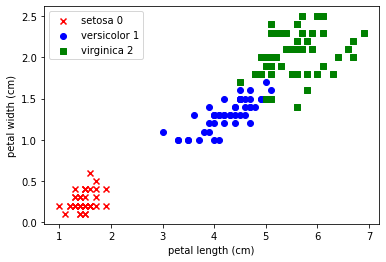

In [8]:
plt.scatter(iris.data[iris.target==0,2], iris.data[iris.target==0,3], c='r', marker='x', label = 'setosa 0')
plt.scatter(iris.data[iris.target==1,2], iris.data[iris.target==1,3], c='b', marker='o', label = 'versicolor 1')
plt.scatter(iris.data[iris.target==2,2], iris.data[iris.target==2,3], c='g', marker='s', label = 'virginica 2')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [9]:
X = iris.data[50:,[2,3]] # only use petal length and petal width
y = iris.target[50:]-1 # only consider the first two classes 0 and 1
y.shape

(100,)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,y)

LogisticRegression()

In [ ]:
model.predict([[4,1.2], [6,2],[6,0.2]])

array([0, 1, 0])

In [17]:
split = 80
ran_index = np.random.permutation(100)
X_train, X_test = X[ran_index[:split], :], X[ran_index[split:], :]
y_train, y_test = y[ran_index[:split]], y[ran_index[split:]]

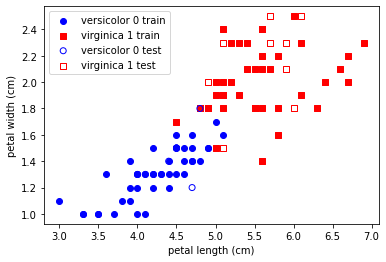

In [18]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='b', marker='o', label = 'versicolor 0 train')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='r', marker='s', label = 'virginica 1 train')

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1],  marker='o', label = 'versicolor 0 test',facecolors='none', edgecolors='b')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], marker='s', label = 'virginica 1 test', facecolors='none',edgecolors='r')


plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [19]:
# find mean and standard deviation of features in the training set
mu = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print(mu, std)

[4.86375 1.63875] [0.85238544 0.41276317]


In [20]:
# transform training and testing input using mu and std from training set
X_train = (X_train - mu)/std
X_test = (X_test - mu)/std

In [21]:
np.mean(X_train, axis=0)

array([-1.63757896e-15,  1.63757896e-16])

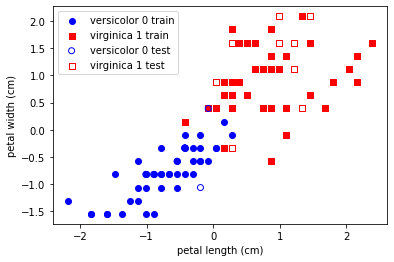

In [22]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='b', marker='o', label = 'versicolor 0 train')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='r', marker='s', label = 'virginica 1 train')

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1],  marker='o', label = 'versicolor 0 test',facecolors='none', edgecolors='b')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], marker='s', label = 'virginica 1 test', facecolors='none',edgecolors='r')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

# binary classification with logistic regression

**Logistic function**
\begin{equation}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}

\begin{equation}
\frac{d}{dz} \sigma(z) = \sigma(z) (1- \sigma(z))
\end{equation}

In [23]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

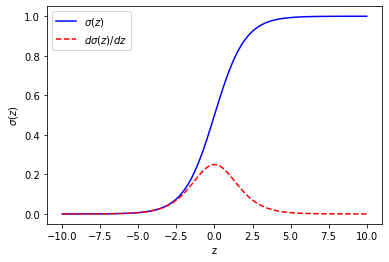

In [ ]:
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z), 'b-', label = '$\sigma(z)$')
plt.plot(z, sigmoid_prime(z), 'r--', label = '$d\sigma(z)/dz$')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.legend()

$\hat{p}$: probability to be class 1

Binary classification 
\begin{equation}
\hat{y} =
\left\{
\begin{array}{ccc}
0 & , & \hat{p} < 0.5\\
1& , & \hat{p} \ge 0.5\\
\end{array}
\right.
\end{equation}

Logistic regression prediction $\hat{p} = \sigma({\bf w}^T \cdot {\bf x}) = \frac{1}{1 + e^{-{\bf w}^T \cdot {\bf x}}}$, where the bias term $w_0$ has been absorbed into ${\bf w}$ under the convention that $x_0 = 1$.

Binary classification with logistic regression
\begin{equation}
\hat{y} =
\left\{
\begin{array}{ccc}
0 & , & {\bf w}^T \cdot {\bf x} < 0\\
1& , & {\bf w}^T \cdot {\bf x} \ge 0\\
\end{array}
\right.
\end{equation}

**linear separability** and **nonlinear transformation**

(-0.3, 0.3, -0.3, 0.3)

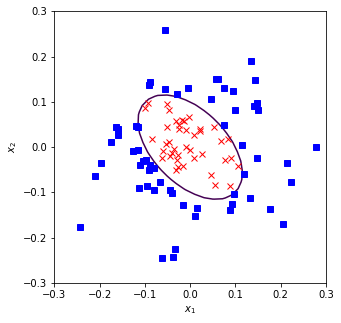

In [ ]:
from matplotlib.patches import Ellipse

Xnonlinear = np.random.normal(0,0.1, size=(100,2))
yclass = np.array(Xnonlinear[:,0]**2+Xnonlinear[:,1]**2 + Xnonlinear[:,0]*Xnonlinear[:,1] <0.01)
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(Xnonlinear[yclass==1,0],Xnonlinear[yclass==1,1], 'rx')
plt.plot(Xnonlinear[yclass==0,0],Xnonlinear[yclass==0,1], 'bs')

xx = np.linspace(-0.5, 0.5, 50)
yy = np.linspace(-0.5, 0.5, 50)
XX, YY = np.meshgrid(xx, yy)
F = XX**2 + YY**2 + XX*YY - 0.01
ax.contour(XX, YY, F, levels=[0]) # take level set corresponding to 0
#circle = plt.Circle((0, 0), 0.1, edgecolor='r', facecolor = 'none')
#ellipse = Ellipse((0, 0), 0.1*math.sqrt(2), 0.2*math.sqrt(2), angle = 45,edgecolor='r', facecolor = 'none')
#ax.add_patch(ellipse)
ax.set_aspect(1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-0.3,0.3,-0.3,0.3])

Text(0, 0.5, '$x_2^2$')

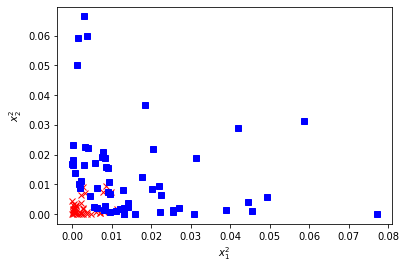

In [ ]:
plt.plot(Xnonlinear[yclass==1,0]**2,+Xnonlinear[yclass==1,1]**2, 'rx')
plt.plot(Xnonlinear[yclass==0,0]**2,+Xnonlinear[yclass==0,1]**2, 'bs')
plt.xlabel('$x_1^2$')
plt.ylabel('$x_2^2$')

Text(0, 0.5, '$x_1$')

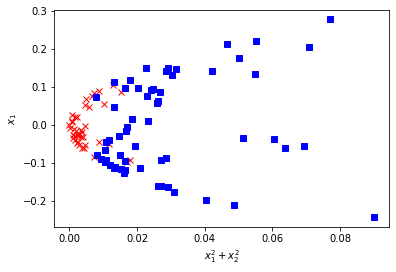

In [ ]:
plt.plot(Xnonlinear[yclass==1,0]**2+Xnonlinear[yclass==1,1]**2,Xnonlinear[yclass==1,0], 'rx')
plt.plot(Xnonlinear[yclass==0,0]**2+Xnonlinear[yclass==0,1]**2,Xnonlinear[yclass==0,0], 'bs')
plt.xlabel('$x_1^2 + x_2^2$')
plt.ylabel('$x_1$')

Text(0, 0.5, '$y$')

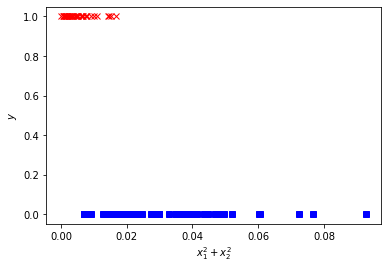

In [ ]:
plt.plot(Xnonlinear[yclass==1,0]**2+Xnonlinear[yclass==1,1]**2,yclass[yclass==1], 'rx')
plt.plot(Xnonlinear[yclass==0,0]**2+Xnonlinear[yclass==0,1]**2,yclass[yclass==0], 'bs')
plt.xlabel('$x_1^2 + x_2^2$')
plt.ylabel('$y$')

Text(0, 0.5, '$x_1 x_2$')

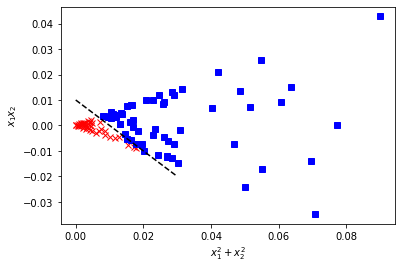

In [ ]:
plt.plot(Xnonlinear[yclass==1,0]**2+Xnonlinear[yclass==1,1]**2,Xnonlinear[yclass==1,0]*Xnonlinear[yclass==1,1], 'rx')
plt.plot(Xnonlinear[yclass==0,0]**2+Xnonlinear[yclass==0,1]**2,Xnonlinear[yclass==0,0]*Xnonlinear[yclass==0,1], 'bs')
plt.plot([0, 0.03],[0.01,-0.02],'k--')
plt.xlabel('$x_1^2 + x_2^2$')
plt.ylabel('$x_1 x_2$')

# Training a logistic regression classifier

Information entropy for distribution $\{ p_k\}$
\begin{equation}
S(\{ p_k\}) = - \sum_k p_k \log_2 p_k = \langle -\log_2 p_k \rangle\ge 0
\end{equation}




Cost function of logistic regression -- **cross entropy**
\begin{equation}
J({\bf w}) =  -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log \hat{p}_i + (1 - y_i) \log (1- \hat{p}_i)\right]  =  -\frac{1}{m} \sum_{i=1}^m \left[ {\mathbb 1}(y_i=1) \log \hat{p}_i + {\mathbb 1}(y_i=0) \log (1- \hat{p}_i)\right]
\end{equation}
where the indicator function ${\mathbb 1}(A) = 1$ if $A$ is true and $0$ if $A$ is false.

Cost function for one sample
\begin{equation}
J_1({\bf w}) = 
\left\{
\begin{array}{ccc}
-\log \hat{p}  = -\log \sigma(z) & , & y = 1\\
-\log (1- \hat{p}) = -\log (1-\sigma(z)) & , &  y = 0\\
\end{array}
\right.
\end{equation}
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '$J_1$')

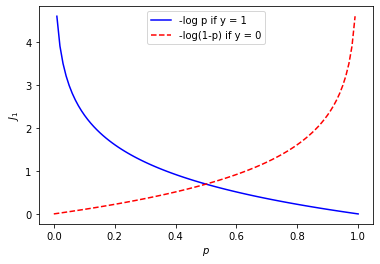

In [24]:
p = np.linspace(0,1,100)
plt.plot(p, -np.log(p),'b-', label = '-log p if y = 1') 
plt.plot(p, -np.log(1-p),'r--', label = '-log(1-p) if y = 0') 
plt.legend()
plt.xlabel('$p$')
plt.ylabel('$J_1$')

Partial derivative of cost function for logistic regression
\begin{equation}
\frac{\partial}{\partial w_j}  J({\bf w}) = \frac{1}{m} \sum_{i=1}^m [ \sigma({\bf w}^T \cdot {\bf x}_i) - y_i ] x_{ij} =  \frac{1}{m} \sum_{i=1}^m \Delta y_i x_{ij}, ~~~~~~j = 0,1,\cdots, n
\end{equation}

Gradient vector of cost function for logistic regression
\begin{equation}
\nabla_{\bf w} J({\bf w}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_0}  J({\bf w})\\
\frac{\partial}{\partial w_1}  J({\bf w})\\
\vdots\\
\frac{\partial}{\partial w_n}  J({\bf w})
\end{bmatrix}_{(n+1)\times 1} = \frac{1}{m}
\begin{bmatrix}
\sum_{i=1}^m \Delta y_i x_{i0}\\
\sum_{i=1}^m \Delta y_i x_{i1}\\
\vdots\\
\sum_{i=1}^m \Delta y_i x_{in}
\end{bmatrix} =\frac{1}{m}
\begin{bmatrix}
{\bf x}_{:, 0}^T \cdot \Delta {\bf y} \\
{\bf x}_{:, 1}^T \cdot \Delta {\bf y}\\
\vdots\\
{\bf x}_{:, n}^T \cdot \Delta {\bf y}
\end{bmatrix} =  \frac{1}{m}
\begin{bmatrix}
-{\bf x}_{:, 0}^T-  \\
-{\bf x}_{:, 1}^T- \\
\vdots\\
-{\bf x}_{:, n}^T-  
\end{bmatrix} 
\cdot \Delta {\bf y} \\
= \frac{1}{m} \sum_{i=1}^m  \Delta y_i
\begin{bmatrix}
 x_{i0}\\
 x_{i1} \\
\vdots\\
x_{in}   
\end{bmatrix}  
=\frac{1}{m} \sum_{i=1}^m  \Delta y_i {\bf x}_i
= \frac{1}{m} {\bf X}^T \cdot [\sigma({\bf X} \cdot {\bf w}) - {\bf y} ]
\end{equation}
where $\sigma({\bf X} \cdot {\bf w})$ is a $m \times 1$ column vector after broadcasting

The (stochastic) gradient descent algorithm for logistic regression with cross entropy loss will be similar to that of linear regression with MSE loss, except to replace $\hat{\bf y}$ with $\sigma({\bf X} \cdot {\bf w})$ in $\Delta {\bf y}$.

In [25]:
def log_loss(p, y):
  '''
  cross entropy loss for binary classification
  p = sigmoid(w X) is a length m vector of predicted probability  
  y = [0,1,....] is a length m vector of labels
  '''
  J = y*np.log(p) + (1-y)*np.log(1-p)
  #J = -np.average(J)
  return -np.average(J)

In [26]:
# SGD
random_state = 1
ran_gen = np.random.RandomState(random_state)

eta = 0.001
d = 2 # x_1, x_2, after standard rescaling, w_0 = 0
n_epochs = 1000
train_size = split
batch_size = 10
n_iterations = train_size//batch_size
print(n_iterations, 'iterations per epoch')

#initialization
w = ran_gen.normal(0, 0.1, size=[d,1]) # + w_opt
#w = np.array([-0.2, 11, -34,  23]).reshape(4,1)
#w = w_opt
print('initial weights:', w.reshape(d))

train_loss, test_loss = [], []
for epoch in range(n_epochs):
  for i in range(n_iterations): # such that each sample can be selected once on average in one epoch 
    random_indices = ran_gen.choice(train_size, size=batch_size, replace=False)
    X_batch, y_batch= X_train[random_indices, :], y_train[random_indices]
    #X_batch, y_batch = X_train, y_train
    
    gradient = 1/batch_size * X_batch.T.dot( sigmoid(X_batch.dot(w)) - y_batch.reshape(batch_size, 1))
    w = w - eta*gradient

  #mse = np.average(( sigmoid(X_train.dot(w)) - y_train)**2)
  #mse = np.average(( np.round(sigmoid(X_train.dot(w))).ravel() - y_train)**2)
  cross_entropy = log_loss(sigmoid(X_train.dot(w)).ravel(), y_train)
  train_loss.append(cross_entropy)
  #mse = np.average(( sigmoid(X_test.dot(w)) - y_test)**2)
  #mse = np.average(( np.round(sigmoid(X_test.dot(w))).ravel() - y_test)**2)
  cross_entropy = log_loss(sigmoid(X_test.dot(w)).ravel(), y_test)
  test_loss.append(cross_entropy)

  #print(epoch, mse)

print('final weights:', w.reshape(d))


8 iterations per epoch
initial weights: [ 0.16243454 -0.06117564]
final weights: [1.22310645 1.23238632]


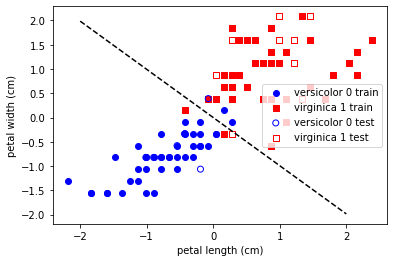

In [27]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='b', marker='o', label = 'versicolor 0 train')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='r', marker='s', label = 'virginica 1 train')

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1],  marker='o', label = 'versicolor 0 test',facecolors='none', edgecolors='b')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], marker='s', label = 'virginica 1 test', facecolors='none',edgecolors='r')

#w_1 x_1 + w_2 x_2 = 0
x1 = np.linspace(-2,2,100)
x2 = - w[0]*x1/w[1]
plt.plot(x1,x2,'k--')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

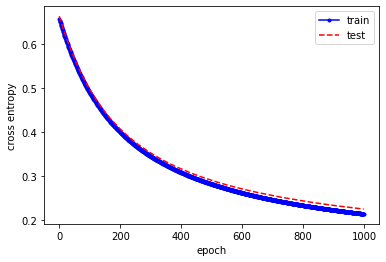

In [28]:
# training curve
plt.plot(range(n_epochs),train_loss,'b.-', label='train')
plt.plot(range(n_epochs),test_loss,'r--', label='test')
#plt.ylim(0,0.05)
plt.xlabel('epoch')
plt.ylabel('cross entropy')
plt.legend()

In [ ]:
np.round(sigmoid(X_train.dot(w))).ravel() - y_train

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [ ]:
np.round(sigmoid(X_test.dot(w))).ravel() - y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

# object-oriented programming (OOP) as oppose to funtional programming

In [29]:
class LogisticRegressionSGD(object):
  """
  Logistic regression using stochastic gradient descent

  parameters:

  attributes: 
     w_: shape = [1+n_features], including the bias term w_[0]

  methods:
  """
  def __init__(self, eta=0.01, n_epochs=100, batch_size=10, random_state=1):
    self.eta = eta
    self.n_epochs = n_epochs
    self.batch_size = batch_size
    self.random_state = random_state

  def fit(self, X, y):
    """
    X: shape = [n_samples, n_features], excluding bias term 1
    y: shape = [n_samples] 
    """
    ran_gen = np.random.RandomState(self.random_state)
    #self.w_ = ran_gen.normal(loc=0.0, scale=0.1, size=X.shape[1]+1)
    self.w_ = np.zeros(X.shape[1]+1)
    self.w_[1:] = ran_gen.normal(loc=0.0, scale=0.1, size=X.shape[1])
    print('initial weights:', self.w_)

    self.cost_ = []

    train_size = X.shape[0]
    n_iterations = train_size // self.batch_size

    for epoch in range(self.n_epochs):
        for i in range(n_iterations):
            random_indices = ran_gen.choice(train_size, size=self.batch_size, replace=False)
            X_batch, y_batch= X[random_indices, :], y[random_indices]
            z = self.logit(X_batch)
            p = self.activation(z)
            dy = p - y_batch
            
            self.w_[1:] -= self.eta*X_batch.T.dot(dy) / batch_size
            #self.w_[0] -= self.eta* dy.sum() / batch_size

        cost = self.cross_loss(self.activation(self.logit(X)), y)
        self.cost_.append(cost)
    return self

  def predict(self, X):
    p_pred = self.activation(self.logit(X)).ravel()
    #y_pred = np.round(self.activation(self.logit(X))).ravel()

    return p_pred

  def classify(self, X, threshold = 0.5):
    return np.where(self.predict(X)>=threshold, 1, 0 )


  def logit(self, X):
    """
    overall signal before activation
    z = w^T X + bias
    """
    z = np.dot(X, self.w_[1:]) + self.w_[0]
    return z

  def activation(self, z):
    return 1./(1. + np.exp(-np.clip(z, -150,150))) 


  def cross_loss(self, p, y):
    m = len(y)
    J =  -y.dot(np.log(p)) - (1-y).dot(np.log(1-p))
    J = J/m
    return J
  


In [30]:
model = LogisticRegressionSGD(eta=0.001, n_epochs=1000, batch_size=10, random_state=1)

In [31]:
model.fit(X_train, y_train)

initial weights: [ 0.          0.16243454 -0.06117564]


In [32]:
weights = model.w_
print(weights)

[0.         1.22310645 1.23238632]


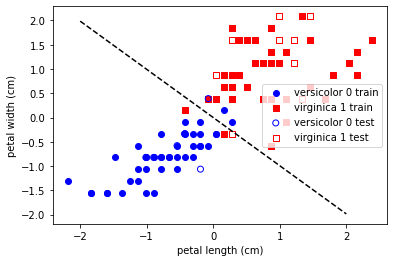

In [41]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='b', marker='o', label = 'versicolor 0 train')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='r', marker='s', label = 'virginica 1 train')

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1],  marker='o', label = 'versicolor 0 test',facecolors='none', edgecolors='b')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], marker='s', label = 'virginica 1 test', facecolors='none',edgecolors='r')

#w_0 + w_1 x_1 + w_2 x_2 = 0
x1 = np.linspace(-2,2,100)
x2 = - weights[0]/weights[2] - weights[1]*x1/weights[2]
plt.plot(x1,x2,'k--')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

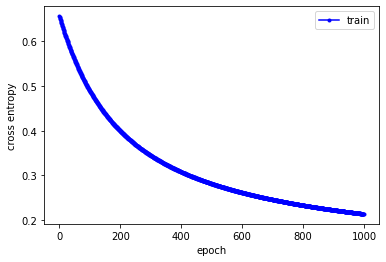

In [34]:
n_epochs = 1000
# training curve
plt.plot(range(n_epochs),model.cost_,'b.-', label='train')
#plt.plot(range(n_epochs),test_loss,'r--', label='test')
#plt.ylim(0,0.05)
plt.xlabel('epoch')
plt.ylabel('cross entropy')
plt.legend()

In [35]:
model.predict(X_test) 

array([0.8920519 , 0.75594951, 0.09527884, 0.10838673, 0.96542121,
       0.98719908, 0.5962749 , 0.90997202, 0.94604251, 0.28166483,
       0.28166483, 0.48119254, 0.95985354, 0.96956431, 0.97749787,
       0.28166483, 0.20128531, 0.28166483, 0.8012958 , 0.17581777])

In [36]:
model.classify(X_test) 

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
sigmoid(X_test.dot(w)).ravel()

In [ ]:
model.predict(X_train)

In [ ]:
model.classify(X_test,0.6) - y_test 

In [ ]:
(y_test*np.log(sigmoid(X_test.dot(w)).ravel())).sum() + ((1-y_test)*np.log(1-sigmoid(X_test.dot(w)).ravel())).sum()

In [ ]:
y_test.dot(np.log(sigmoid(X_test.dot(w)).ravel())) + (1-y_test).dot(np.log(1-sigmoid(X_test.dot(w)).ravel()))

# Performance metrics

**true/false positive (TP/FP)**


**true/false negative (TN/FN)**


**confusion matrix**

| |predicted| class| |
|----|----|----|----|
|actual| $TP$| $FN$| $P$|
|class | $FP$| $TN$| $N$ |
|   | $\hat{P}$ |  $\hat{N}$| $P+N = \hat{P} + \hat{N}$ |


**accuracy**
\begin{equation}
{\rm accuracy} = \frac{TP + TN}{TP + FP + TN + FN} = \frac{TP + TN}{P + N} = \frac{TP + TN}{\hat{P} + \hat{N}}
\end{equation}


**true negative rate (TNR)**, **specificity**, 1 - Type I error
\begin{equation}
{\rm specificity} = \frac{TN}{TN + FP} = \frac{TN}{N}
\end{equation}

**false positive rate (FPR)**, Type I error, 1- specificity: 没病说有病
\begin{equation}
{\rm FPR} = \frac{FP}{FP + TN} = \frac{FP}{N}
\end{equation}

**true positive rate (TPR)**, **recall**, **sensitivity**, 1 - type II error: 检出率, 召回率
\begin{equation}
{\rm recall} = \frac{TP}{TP + FN} = \frac{TP}{P}
\end{equation}

**false negative rate (FNR)**, Type II error: 有病说没病
\begin{equation}
{\rm FNR} = \frac{FN}{TP + FN} = \frac{FN}{P}
\end{equation}

**precision**: 准确率, 说有病真有病
\begin{equation}
{\rm precision} = \frac{TP}{TP + FP} = \frac{TP}{\hat{P}}
\end{equation}


**precision-recall tradeoff**

**precision-recall curve** (PR curve): precision vs. recall

**receiver operating characteristic curve** (ROC curve): sensitivity (recall) vs. 1-specificity, TPR vs. FPR


**area under curve** (AUC)

**mean average precision** (mAP)

**$F_1$ score**
\begin{equation}
F_1 = \frac{2}{\frac{1}{\rm precision} + \frac{1}{\rm recall}}
\end{equation}

In [37]:
y_pred = model.classify(X_train)
print(y_pred)

[0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 1 1]


In [38]:
y_train

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [39]:
P = np.count_nonzero(y_train) # actual positive
N = np.count_nonzero(y_train==0) # actual negative by counting nonzeros
print(P, N)

39 41


In [40]:
P_hat = np.count_nonzero(y_pred) # actual positive
N_hat = np.count_nonzero(y_pred==0) # actual negative by counting nonzeros
print(P_hat, N_hat)

39 41


In [44]:
TP = np.sum(y_pred*y_train)
TN = np.sum(y_pred==y_train)- TP
FP = N - TN
FN = P - TP
P_pred = TP + FP
N_pred = FN + TN
print(TP, FN, P)
print(FP, TN, N)
print(P_pred, N_pred, P+N)
conf_matrix = [[TP, FN, P], [FP, TN, N], [P_pred, N_pred, P+N]]


37 2 39
2 39 41
39 41 80


In [43]:
import pandas as pd
df = pd.DataFrame(conf_matrix, columns=['predicted P','predicted N','total'], index=['actual P','actual N','total'])
df

,predicted P,predicted N,total
actual P,37,2,39
actual N,2,39,41
total,39,41,80


In [45]:
recall = TP / P
precision = TP/ P_pred
FPR = FP/N
print(recall, precision, FPR)

0.9487179487179487 0.9487179487179487 0.04878048780487805


In [46]:
recall = []
precision = []
FPR = []
for threshold in np.linspace(0,1,11):
  y_pred = model.classify(X_train,threshold)
  P = np.count_nonzero(y_train) 
  N = np.count_nonzero(y_train==0)
  TP = np.sum(y_pred*y_train)
  TN = np.sum(y_pred==y_train)- TP
  FP = N - TN
  FN = P - TP
  P_pred = TP + FP
  N_pred = FN + TN
  recall.append(TP / P)
  precision.append(TP/ P_pred)
  FPR.append(FP/N)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


Text(0, 0.5, 'precision')

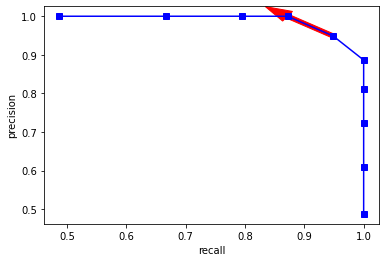

In [47]:
plt.plot(recall, precision,'bs-')
plt.arrow(recall[5], precision[5], recall[6]-recall[5], precision[6]-precision[5], width = 0.01,color = 'r')
plt.xlabel('recall')
plt.ylabel('precision')


Text(0, 0.5, 'TPR (recall, sensitivity)')

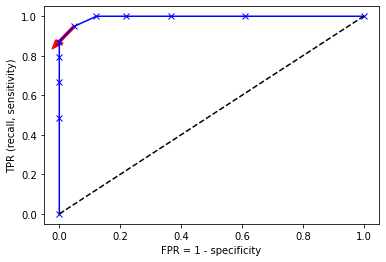

In [48]:
plt.plot(FPR, recall,'bx-')
plt.plot([0,1],[0,1],'k--')
plt.arrow(FPR[5], recall[5], FPR[6] - FPR[5],recall[6]-recall[5], width = 0.01, color = 'r')

plt.xlabel('FPR = 1 - specificity')
plt.ylabel('TPR (recall, sensitivity)')